# Exploring the Moving Image Archive dataset

Created in October-December 2022 for the National Library of Scotland's Data Foundry by [Gustavo Candela, National Librarian’s Research Fellowship in Digital Scholarship 2022-23](https://data.nls.uk/projects/the-national-librarians-research-fellowship-in-digital-scholarship-2022-23/)

### About the Moving Image Archive Dataset

This dataset represents the descriptive metadata from the Moving Image Archive catalogue, which is Scotland’s national collection of moving images.

- Data format: metadata available as MARCXML and Dublin Core
- Data source: https://data.nls.uk/data/metadata-collections/moving-image-archive/

### Table of contents

- [Preparation](#Preparation)
- [Loading the CSV data into pandas](#Loading-the-CSV-data-into-pandas)
- [Cleaning the data](#Cleaning-the-data)
- [WordCloud visualisation](#WordCloud-visualisation)

### Citations

- Candela, G., Sáez, M. D., Escobar, P., & Marco-Such, M. (2022). Reusing digital collections from GLAM institutions. Journal of Information Science, 48(2), 251–267. https://doi.org/10.1177/0165551520950246

### Preparation

Import the libraries required to explore the summary of each record included in the dataset to present a word cloud.

In [15]:
import pandas as pd
import re
from wordcloud import WordCloud

### Loading the CSV data into pandas

In [16]:
path_csv = "../data/output/movingImageArchive.csv"
df = pd.read_csv (path_csv, sep=',')

#### Let's see the structure of the dataset

In [17]:
## structure of the data
print(df.columns.tolist())

## set summary column type to string
df = df.astype({"summary": str})
print(df.dtypes)

['title', 'author', 'authorOrganisation', 'place_publication', 'date', 'extent', 'credits', 'subjects', 'summary', 'details', 'link', 'geographicNames', 'contentType', 'mediaType', 'carrierType', 'generalNote', 'thumbnail']
title                  object
author                 object
authorOrganisation     object
place_publication      object
date                  float64
extent                 object
credits                object
subjects               object
summary                object
details                object
link                   object
geographicNames        object
contentType            object
mediaType              object
carrierType            object
generalNote            object
thumbnail              object
dtype: object


#### Let's explore the content

In [18]:
# number of records
print(df.count())

title                 20599
author                  770
authorOrganisation      844
place_publication     20608
date                  15575
extent                20608
credits               14889
subjects               8006
summary               20608
details               20260
link                  20608
geographicNames        4604
contentType           20608
mediaType             20608
carrierType           20608
generalNote           20608
thumbnail              5345
dtype: int64


In [19]:
print(df["geographicNames"].unique())

['Glasgow' 'Edinburgh' 'Dunbartonshire' nan 'Glasgow -- Renfrewshire'
 'Aberdeen' 'Renfrewshire' 'Forth River' 'Glasgow -- Highlands, the'
 'Borders -- Dumfriesshire -- Edinburgh -- Fife -- Glasgow -- Stirling'
 'Dumfriesshire -- Fife -- Glasgow -- Renfrewshire' 'Ayrshire'
 'Lanarkshire' 'Edinburgh -- Glasgow -- Renfrewshire'
 'Dunbartonshire -- Glasgow -- Lanarkshire' 'Dundee' 'Bute'
 'Morayshire -- Perth' 'Borders' 'Perth' 'Highlands, the' 'Sutherland'
 'Angus -- Dundee' 'Aberdeen -- Aberdeenshire' 'Glasgow -- West Lothian'
 'Dumfriesshire' 'Ayrshire -- Dumfriesshire' 'West Lothian' 'Fife'
 'Borders -- Edinburgh -- Glasgow -- Invernesshire' 'Aberdeenshire'
 'Aberdeen -- Borders -- Edinburgh -- Fife -- Forth River -- Glasgow -- Stirling'
 'East Lothian -- Edinburgh -- Forth River -- Glasgow -- Gorbals, the'
 'Glasgow -- Perth' 'Dunbartonshire -- Glasgow' 'Shetland Islands'
 'Invernesshire'
 'Caithness -- Highlands, the -- Invernesshire -- Orkney Islands -- Outer Hebrides -- Ross-shire

The information stored in the metadata field place of publication is the same string in all the records.

In [21]:
print(df["place_publication"].unique())

['[Place of production not identified]'
 '[Place of production not identified] : ']


#### Let's check the media, carrier and content type metadata fields

In [22]:
print(df["mediaType"].unique())
print(df["carrierType"].unique())
print(df["contentType"].unique())

['unspecified -- rdamedia']
['unspecified  -- rdacarrier']
['two-dimensional moving image -- rdacontent']


#### How many thumbnails are available? How can we visualise them?

In [23]:
print(df["thumbnail"].describe())

count                                                  5345
unique                                                 5345
top       http://deriv.nls.uk/dcn19/1358/3808/135838082....
freq                                                      1
Name: thumbnail, dtype: object


In [24]:
from IPython.display import Image, display

listOfImageNames = df[df["thumbnail"].notnull()]["thumbnail"].head(5)

for imageName in listOfImageNames:
    print(imageName)
    display(Image(url=imageName))

http://deriv.nls.uk/dcn19/1358/3808/135838082.19.jpg


http://deriv.nls.uk/dcn19/7524/75247309.19.jpg


http://deriv.nls.uk/dcn19/1930/5561/193055617.19.jpg


http://deriv.nls.uk/dcn19/1930/5561/193055611.19.jpg


http://deriv.nls.uk/dcn19/7496/74960120.19.jpg


#### Let's check the subjects

In [25]:
# get unique values
subjects = pd.unique(df['subjects'].str.split(' -- ', expand=True).stack()).tolist()
print("Total unique subjects:" + str(len(subjects)))
for s in sorted(subjects, key=str.lower):
    print(s)

Total unique subjects:91
Agriculture
Air displays and shows
Air Raids
Aircraft see also Helicopters
Airports
Animals
Architecture and Buildings
Art and Artists, general  
Arts and Crafts
Birds
British Empire, the
Broadcasting, general
Buddhism
Bulldozers
Bus Stations and Depots
Buses and Coaches, general
Butchers and Butcher Shops
Cafeterias and Canteens
Camping
Canals
Canoeing
Carriages
Celebrations, Traditions and Customs
Celts and Celtic Culture
Ceremonies
Cheese and Cheese Making
Children and Infants
Christmas  see also New Year
Construction and Engineering
Crime, Punishment and Law Enforcement
Dentistry
Depression, the
Disillusionment
Easter
Education
Emotions, Attitudes and Behaviour
Employment, Industry and Industrial Relations
Environment
Ferries
Fire Service
Fish and Fishing
Fish Gutting
Fish Markets
Fishing Boats
Fishwives
Food and Drink
Forth River
Gaelic
Healthcare
Highland Games
Hogmanay
Holiday Camps
Home Guard
Home Life
Housing and Living Conditions
Institutional Care
La

#### Let's explore the information included in the summary column

In [26]:
print(df["summary"].head(10))

0    The Botanic Gardens, Glasgow with shots of the...
1    Footage of the last trams to run in Glasgow, a...
2    The story of the last Edinburgh tram.  Shots o...
3    Footage of the last tram to run in Glasgow. Th...
4    Scottish school pupils studying scientific and...
5    Glasgow University celebrates its Fifth Centen...
6    Celebrations in Glasgow attended by students f...
7    Procession of dignitaries in horse-drawn carri...
8    Harry Lauder leaves for Liverpool from London'...
9    A selection of amateur films made in the early...
Name: summary, dtype: object


### Cleaning the data

The text may include special  punctuation characters that can be removed. In addition, the function lower() converts all capital letters in the text area to small lettersthe text is lowercase. 

In [27]:
# Remove punctuation
df['summary_processed'] = df['summary'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the text to lowercase
df['summary_processed'] = df['summary_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df['summary_processed'].head()

0    the botanic gardens glasgow with shots of the ...
1    footage of the last trams to run in glasgow an...
2    the story of the last edinburgh tram  shots of...
3    footage of the last tram to run in glasgow thi...
4    scottish school pupils studying scientific and...
Name: summary_processed, dtype: object

### WordCloud visualisation

The following cell of code enables the creation of a wordcloud based on the textual descriptions provided by the column summary.

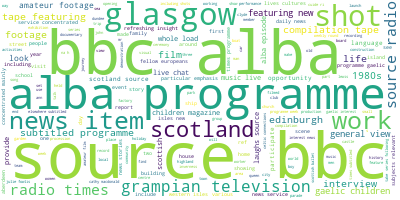

In [28]:
# Join the different summaries together.
long_string = ','.join(list(df['summary_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()